In [1]:
import pickle
from kid_readout.analysis import iqnoise

In [2]:
# 148 GHz 3 turns. This data set had a problem and is not used in analysis.
with open('/data/readout/pkl/2015-05-20_105213_mmw_continuous-wave_148_GHz.pkl') as f:
    t3 = pickle.load(f)

# 148 GHz 3.5 turns
with open('/data/readout/pkl/2015-05-20_100424_mmw_continuous-wave_148_GHz.pkl') as f:
    t3p5 = pickle.load(f)

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
t3a23 = [t for t in t3 if t.resonator_index==1 and t.atten==23].pop()
t3p5a23 = [t for t in t3p5 if t.resonator_index==1 and t.atten==23].pop()

In [4]:
fr, S, evals, evects, angles, piq = iqnoise.pca_noise(t3p5a23.fractional_fluctuation_timeseries,
                                                 NFFT=None,
                                                 Fs=t3p5a23.timeseries_sample_rate,
                                                 use_log_bins=False)

/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]


using NFFT: 2** 16.0


/home/flanigan/kid_readout/kid_readout/analysis/iqnoise.py:93: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


In [10]:
S_max = np.where(evals[1] == np.max(evals[1][fr>1e3]))[0]
S_max

array([25600])

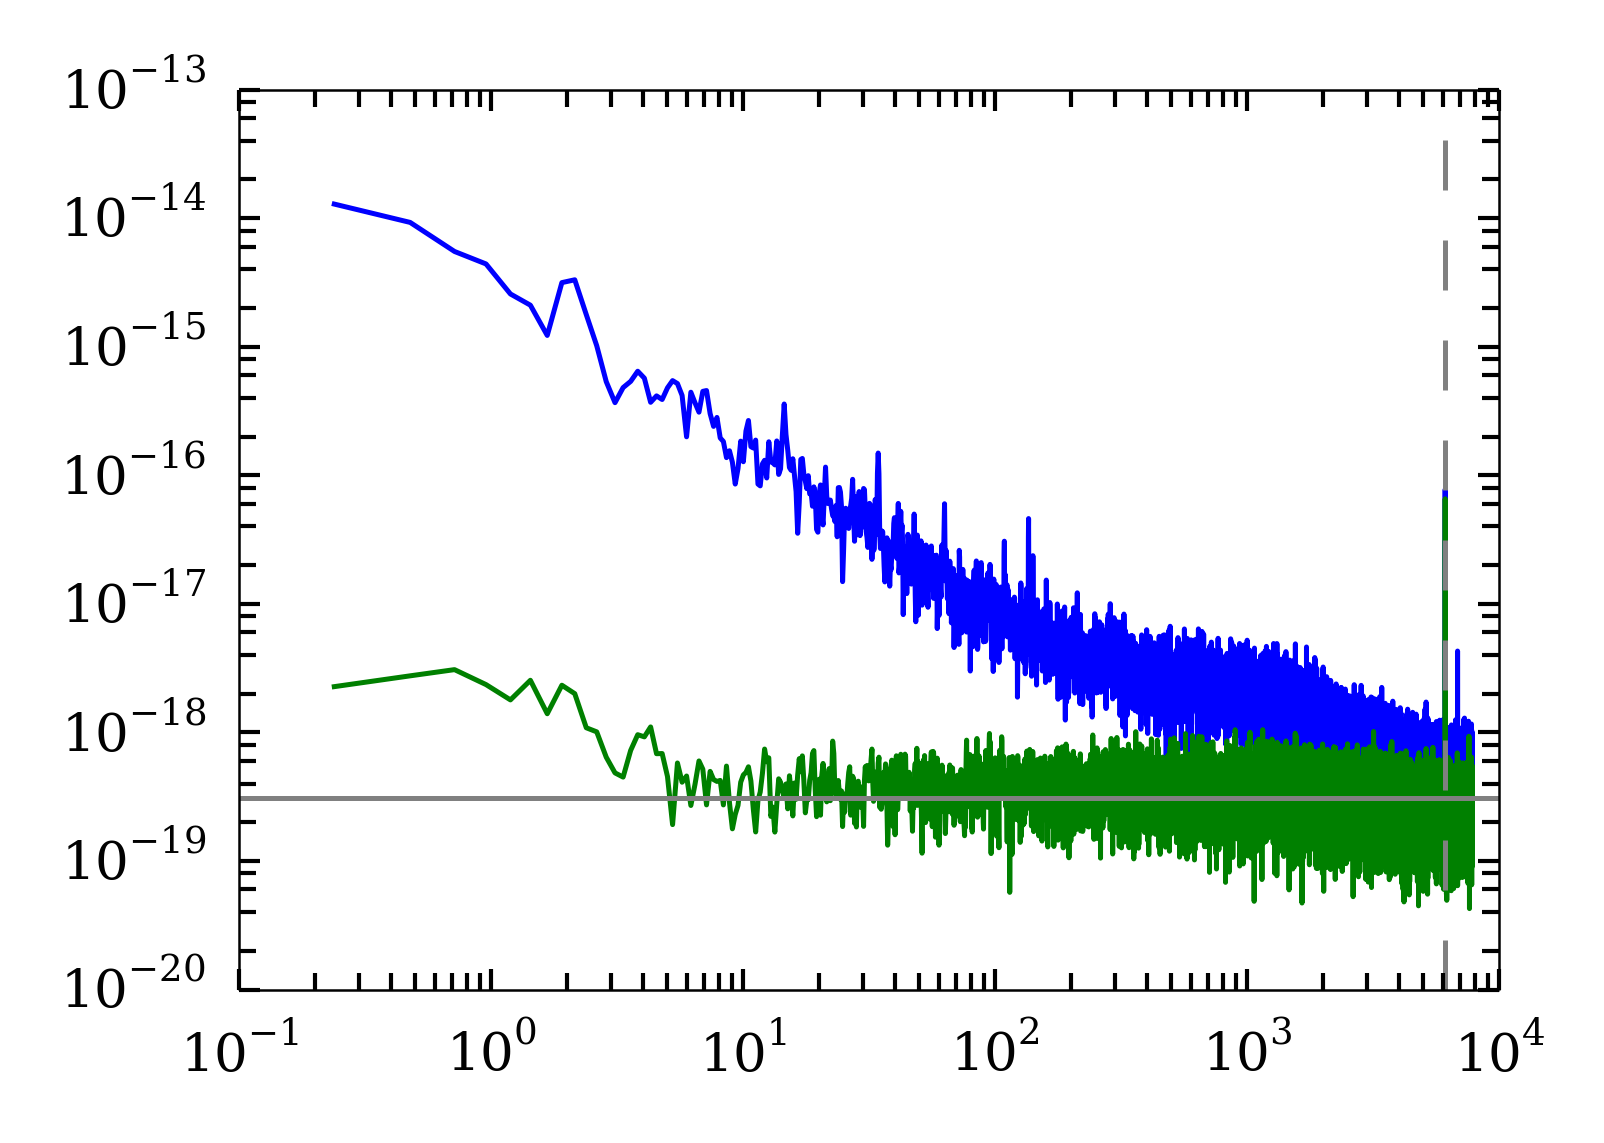

In [11]:
fig, ax = plt.subplots()
ax.loglog(fr, evals[1])

ax.loglog(fr, evals[0])
ax.axvline(fr[S_max], linestyle='--', color='gray')
ax.axhline(np.mean(evals[0]), color='gray')
#ax.set_xlim(1e0, 1e4)

In [12]:
np.save('supplement/t3p5a23_f.npy', fr)
np.save('supplement/t3p5a23_S_detector.npy', evals[1])
np.save('supplement/t3p5a23_S_amplifier.npy', evals[0])